In [3]:
import pandas as pd
import numpy as np

#Store data file path
DATA_PATH = '/content/vehicles.csv'

# read data in a pandas data frame
cars_data = pd.read_csv(DATA_PATH)
print(cars_data.head())
print(cars_data.info())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [4]:
# Data clean up
# Step 1 changing data type.
# coverting the year and odometer from object to integer.

cars_data['year'] = pd.to_numeric(cars_data['year'], errors='coerce')
cars_data['odometer'] = pd.to_numeric(cars_data['odometer'], errors='coerce')


# Step2 - percentage of missing values in dataset

missing_values = cars_data.isnull().sum()
missing_percentage = (missing_values / len(cars_data)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info[missing_info['Missing Values'] > 0])

print(cars_data.info())


              Missing Values  Percentage
year                     504    0.325565
manufacturer            6741    4.354426
model                   1883    1.216345
condition              62042   40.076740
cylinders              63570   41.063769
fuel                     904    0.583949
odometer                1880    1.214408
title_status            2973    1.920443
transmission             829    0.535502
VIN                    57885   37.391478
drive                  47717   30.823342
size                  110524   71.394243
type                   31381   20.270916
paint_color            45229   29.216190
state                      1    0.000646
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154808 entries, 0 to 154807
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            154808 non-null  int64  
 1   region        154808 non-null  object 
 2   price         154808 non-null  int64  
 3   year    

In [5]:
# Cleaning the data -
# Step 3 substitbute or remove missing data

thresold_to_drop = 5 #drop columns with more than 5% data missing

# Columns with missing percentage more than 5% - drop them
cols_to_drop = missing_info[missing_info['Percentage'] > 5].index.tolist()
cars_data.dropna(subset=cols_to_drop, inplace=True)

# cols_to_drop = missing_info[missing_info['Percentage'] < 5].index.tolist()
cols_to_substitue = missing_info[missing_info['Percentage'] < 5].index.tolist()


numeric_cols = cars_data.select_dtypes(include=['number']).columns.tolist()
categorical_cols = cars_data.select_dtypes(exclude=['number']).columns.tolist()

for col in numeric_cols:
    if col in cols_to_substitue:
        cars_data.loc[cars_data[col].isnull(), col] = cars_data[col].mean().astype(int)

for col in categorical_cols:
    if col in cols_to_substitue:
        cars_data.loc[cars_data[col].isnull(), col] = cars_data[col].mode()

print(cars_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 13044 entries, 126 to 154804
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13044 non-null  int64  
 1   region        13044 non-null  object 
 2   price         13044 non-null  int64  
 3   year          13044 non-null  float64
 4   manufacturer  12628 non-null  object 
 5   model         12976 non-null  object 
 6   condition     13044 non-null  object 
 7   cylinders     13044 non-null  object 
 8   fuel          13044 non-null  object 
 9   odometer      13044 non-null  float64
 10  title_status  13044 non-null  object 
 11  transmission  13043 non-null  object 
 12  VIN           13044 non-null  object 
 13  drive         13044 non-null  object 
 14  size          13044 non-null  object 
 15  type          13044 non-null  object 
 16  paint_color   13044 non-null  object 
 17  state         13044 non-null  object 
dtypes: float64(2), int64(2), obj

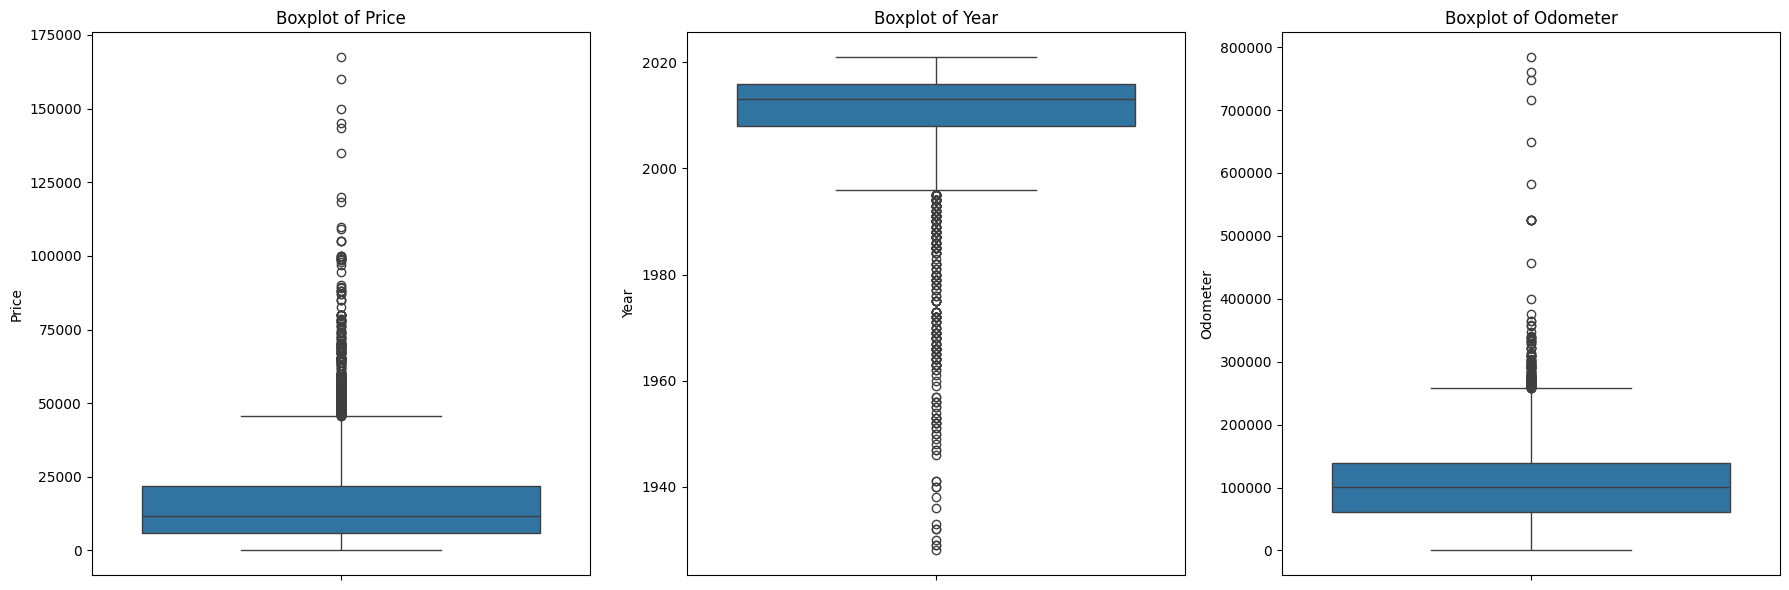

In [6]:
# Rerunning Boxplot to view clean data

# box plot - outlier and histogram - frequency
# numerical values - price, year, odometer

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# price subplot
plt.subplot(1, 3, 1)
sns.boxplot(y=cars_data[cars_data['price'] <= 500000]['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

# year subplot
plt.subplot(1, 3, 2)
sns.boxplot(y=cars_data['year'])
plt.title('Boxplot of Year')
plt.ylabel('Year')

# odometer subplot
plt.subplot(1, 3, 3)
sns.boxplot(y=cars_data[cars_data['odometer'] <= 800000]['odometer'])
plt.title('Boxplot of Odometer')
plt.ylabel('Odometer')

plt.tight_layout()
plt.show()

In [7]:
# looks like alot of outlier are present
# lets remove the outlier for values outside whiskers

def outlier_thresholds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate outlier thresholds for relevant numerical columns
lower_price, upper_price = outlier_thresholds(cars_data, 'price')
lower_year, upper_year = outlier_thresholds(cars_data, 'year')
lower_odometer, upper_odometer = outlier_thresholds(cars_data, 'odometer')

print(f"Lower = {lower_price}, Upper = {upper_price}")
print(f"Lower = {lower_year}, Upper = {upper_year}")
print(f"Lower = {lower_odometer}, Upper = {upper_odometer}")

# Now drop outlier

cars_data_cleaned = cars_data[
    (cars_data['price'] >= lower_price) & (cars_data['price'] <= upper_price) &
    (cars_data['year'] >= lower_year) & (cars_data['year'] <= upper_year) &
    (cars_data['odometer'] >= lower_odometer) & (cars_data['odometer'] <= upper_odometer)
]
cars_data_cleaned.reset_index(drop=True, inplace=True)
print(cars_data_cleaned.info())

Lower = -17870.0, Upper = 45730.0
Lower = 1996.0, Upper = 2028.0
Lower = -58143.625, Upper = 258409.375
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12166 entries, 0 to 12165
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12166 non-null  int64  
 1   region        12166 non-null  object 
 2   price         12166 non-null  int64  
 3   year          12166 non-null  float64
 4   manufacturer  11831 non-null  object 
 5   model         12115 non-null  object 
 6   condition     12166 non-null  object 
 7   cylinders     12166 non-null  object 
 8   fuel          12166 non-null  object 
 9   odometer      12166 non-null  float64
 10  title_status  12166 non-null  object 
 11  transmission  12166 non-null  object 
 12  VIN           12166 non-null  object 
 13  drive         12166 non-null  object 
 14  size          12166 non-null  object 
 15  type          12166 non-null  object 
 16  paint_co

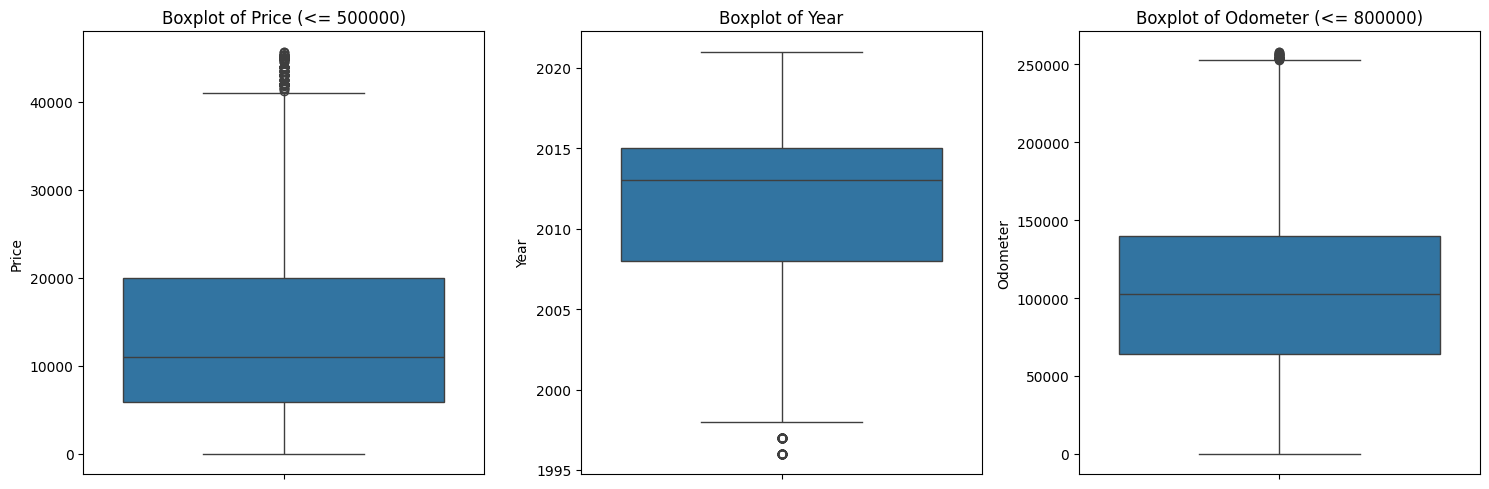

In [8]:
# Rerunning Boxplot to view clean data

# box plot - outlier and histogram - frequency
# numerical values - price, year, odometer

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots
plt.figure(figsize=(15, 5)) # Adjust figure size as needed

# price subplot
plt.subplot(1, 3, 1)
sns.boxplot(y=cars_data_cleaned[cars_data_cleaned['price'] <= 500000]['price'])
plt.title('Boxplot of Price (<= 500000)')
plt.ylabel('Price')

# year subplot
plt.subplot(1, 3, 2)
sns.boxplot(y=cars_data_cleaned['year'])
plt.title('Boxplot of Year')
plt.ylabel('Year')

# odometer subplot
plt.subplot(1, 3, 3)
sns.boxplot(y=cars_data_cleaned[cars_data_cleaned['odometer'] <= 800000]['odometer'])
plt.title('Boxplot of Odometer (<= 800000)')
plt.ylabel('Odometer')

plt.tight_layout()
plt.show()

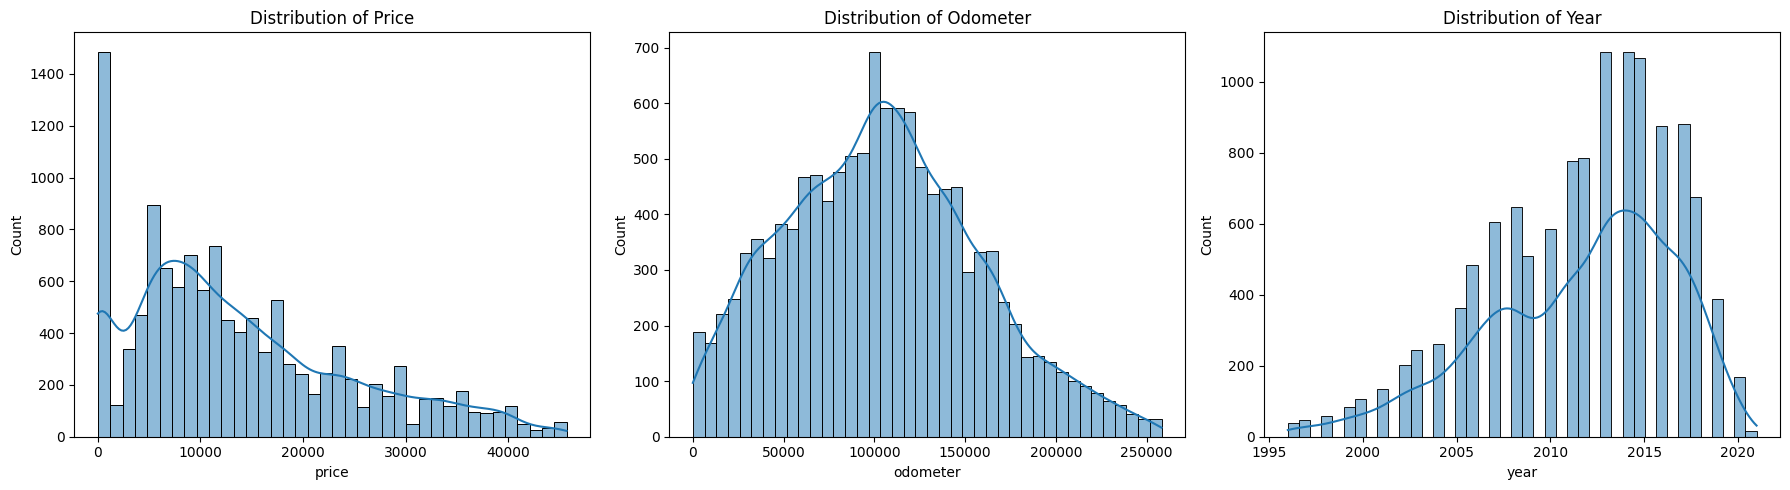

In [9]:
# now data looks cleaner with lesser outliers
# we are now going to visualise the distribution


import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(cars_data_cleaned['price'], kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 3, 2)
sns.histplot(cars_data_cleaned['odometer'], kde=True)
plt.title('Distribution of Odometer')

plt.subplot(1, 3, 3)
sns.histplot(cars_data_cleaned['year'], kde=True)
plt.title('Distribution of Year')

plt.tight_layout()
plt.show()

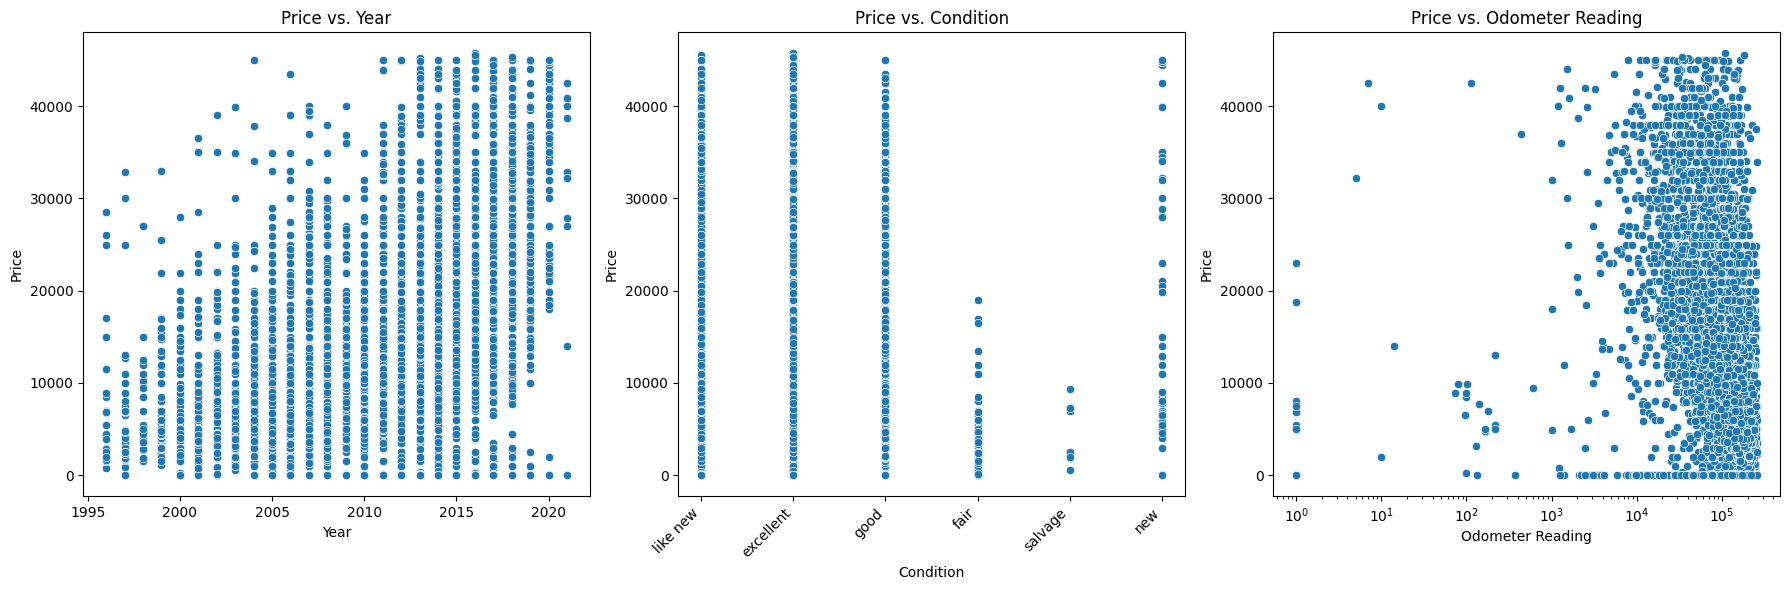

In [10]:

# checking the correlation between different features - year, condition, odometer

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# price against year
plt.subplot(1, 3, 1)
sns.scatterplot(x='year', y='price', data=cars_data_cleaned)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')

# price against condition
plt.subplot(1, 3, 2)
sns.scatterplot(x='condition', y='price', data=cars_data_cleaned)
plt.title('Price vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

# price against odometer
plt.subplot(1, 3, 3)
sns.scatterplot(x='odometer', y='price', data=cars_data_cleaned)
plt.xscale('log') # too much scattered data, changing the scale to logarithmic scale
plt.title('Price vs. Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

                id     price      year  odometer
id        1.000000 -0.016103 -0.068151  0.060475
price    -0.016103  1.000000  0.323357 -0.272988
year     -0.068151  0.323357  1.000000 -0.536871
odometer  0.060475 -0.272988 -0.536871  1.000000


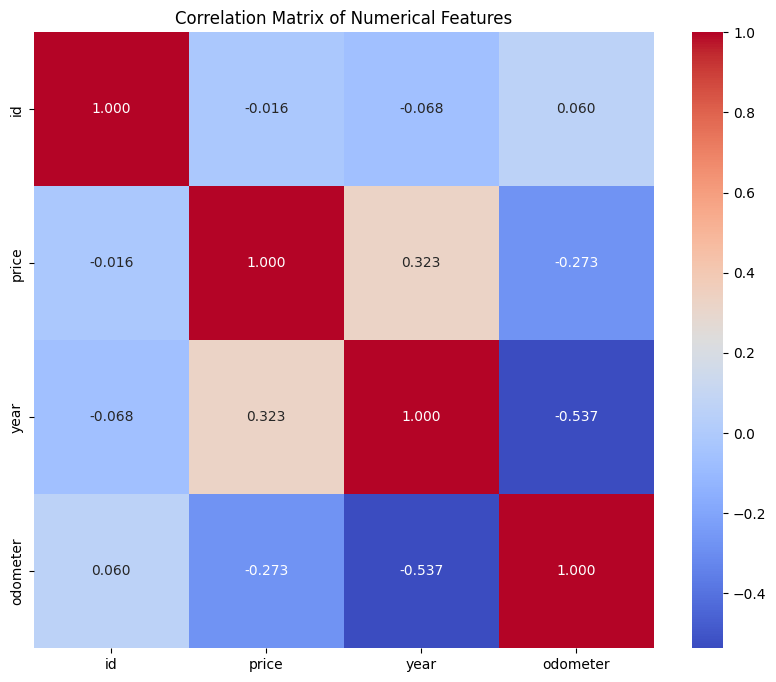

In [11]:
# Creating a correlation matrix for numerical features in the cars_data_cleaned


import matplotlib.pyplot as plt

numerical_cols = cars_data_cleaned.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

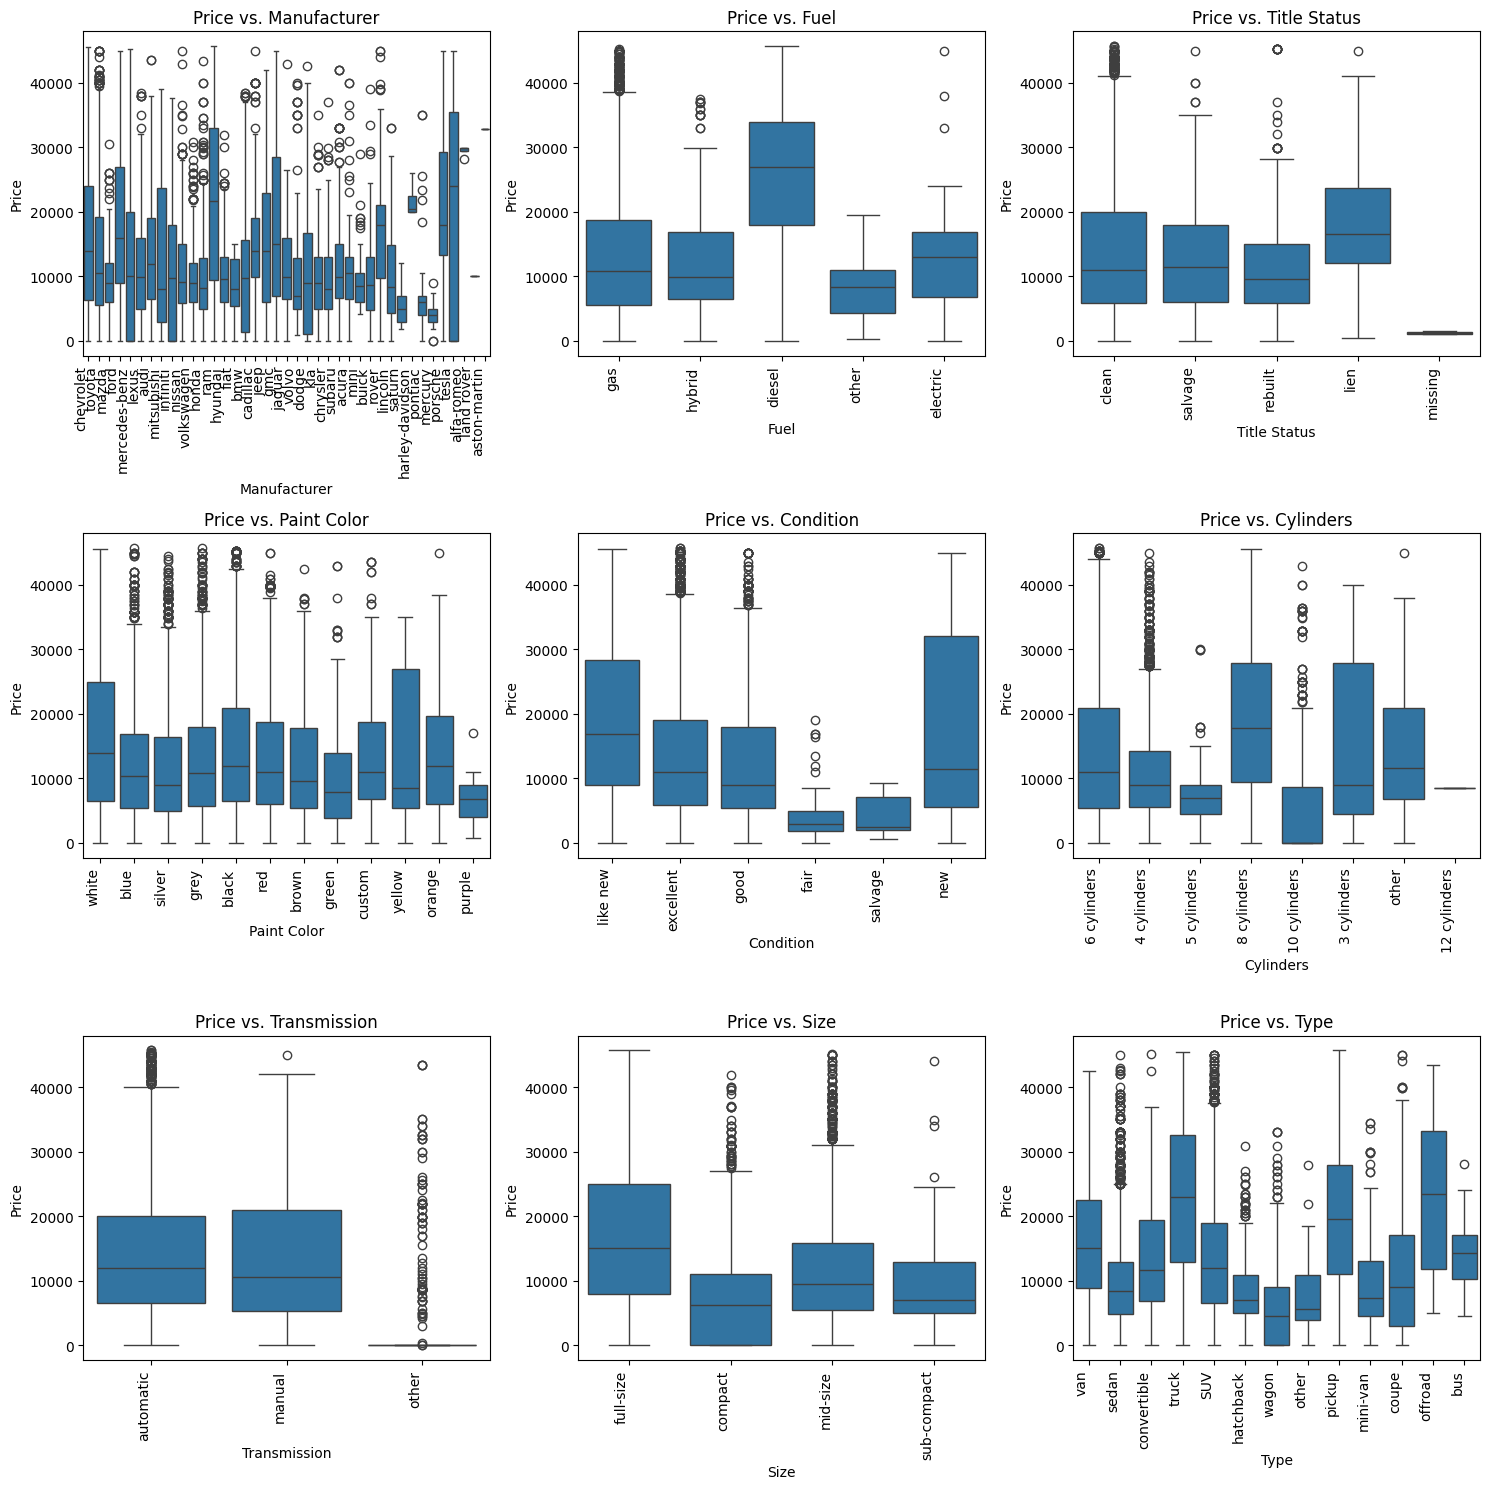

In [12]:
# Now we will visualize categorical features
# By creating box plot for price against -
# manufacturer, fuel, title status, paint color, condition, cylinder, transmission, size, type.

import matplotlib.pyplot as plt

categorical_features = ['manufacturer', 'fuel', 'title_status', 'paint_color', 'condition', 'cylinders', 'transmission', 'size', 'type']
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(15, n_rows * 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=feature, y='price', data=cars_data_cleaned)
    plt.title(f'Price vs. {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Price')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


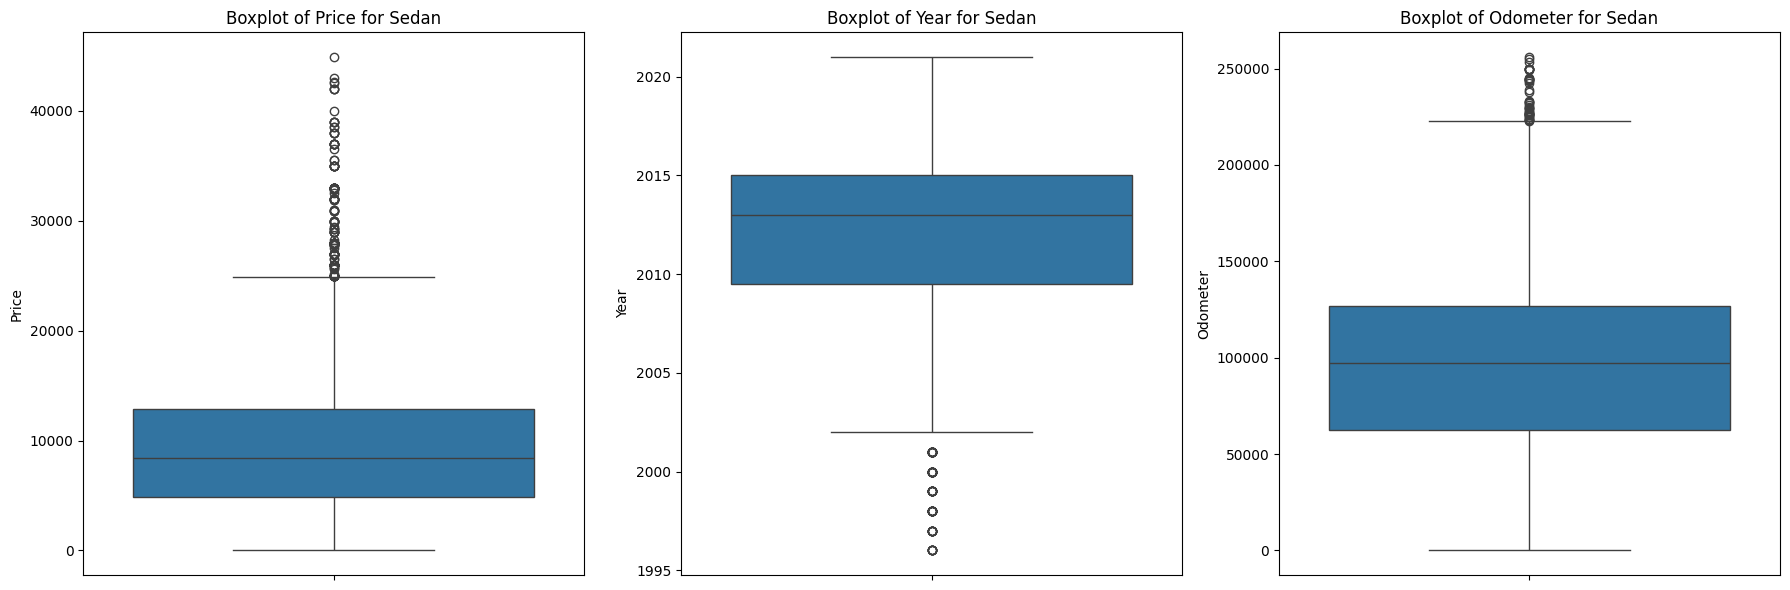

In [13]:
#sedan seems to have alot of outliers, lets do a deep dive into car data for car type sedan

sedan_data = cars_data_cleaned[cars_data_cleaned['type'] == 'sedan'].copy()

sedan_numerical_cols = ['price', 'year', 'odometer']

plt.figure(figsize=(18, 6))

# price subplot
plt.subplot(1, 3, 1)
sns.boxplot(y=sedan_data[sedan_data['price'] <= 500000]['price'])
plt.title('Boxplot of Price for Sedan')
plt.ylabel('Price')

# year subplot
plt.subplot(1, 3, 2)
sns.boxplot(y=sedan_data['year'])
plt.title('Boxplot of Year for Sedan')
plt.ylabel('Year')

# odometer subplot
plt.subplot(1, 3, 3)
sns.boxplot(y=sedan_data[sedan_data['odometer'] <= 800000]['odometer'])
plt.title('Boxplot of Odometer for Sedan')
plt.ylabel('Odometer')

plt.tight_layout()




Filtered outlier data:
<class 'pandas.core.frame.DataFrame'>
Index: 3298 entries, 3 to 12165
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3298 non-null   int64  
 1   region        3298 non-null   object 
 2   price         3298 non-null   int64  
 3   year          3298 non-null   float64
 4   manufacturer  3233 non-null   object 
 5   model         3290 non-null   object 
 6   condition     3298 non-null   object 
 7   cylinders     3298 non-null   object 
 8   fuel          3298 non-null   object 
 9   odometer      3298 non-null   float64
 10  title_status  3298 non-null   object 
 11  transmission  3298 non-null   object 
 12  VIN           3298 non-null   object 
 13  drive         3298 non-null   object 
 14  size          3298 non-null   object 
 15  type          3298 non-null   object 
 16  paint_color   3298 non-null   object 
 17  state         3298 non-null   object 
dtypes: float

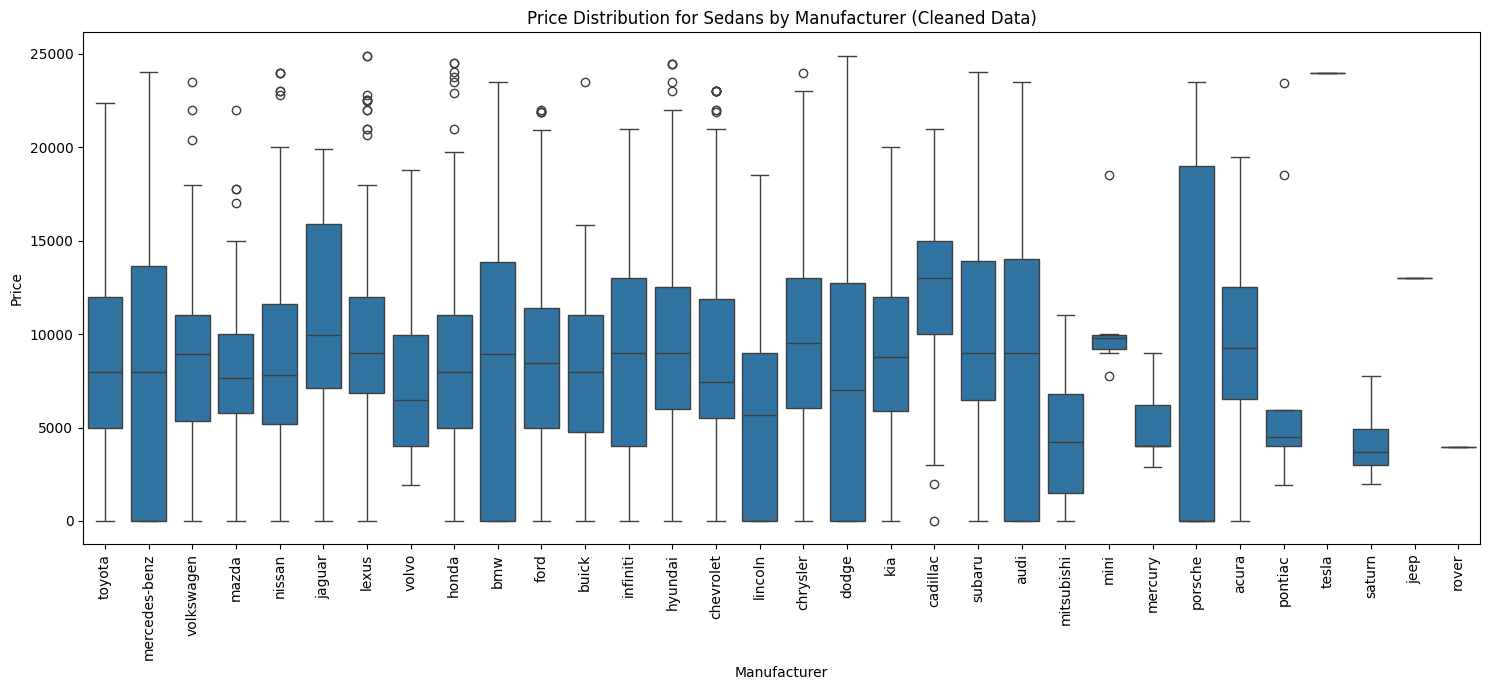

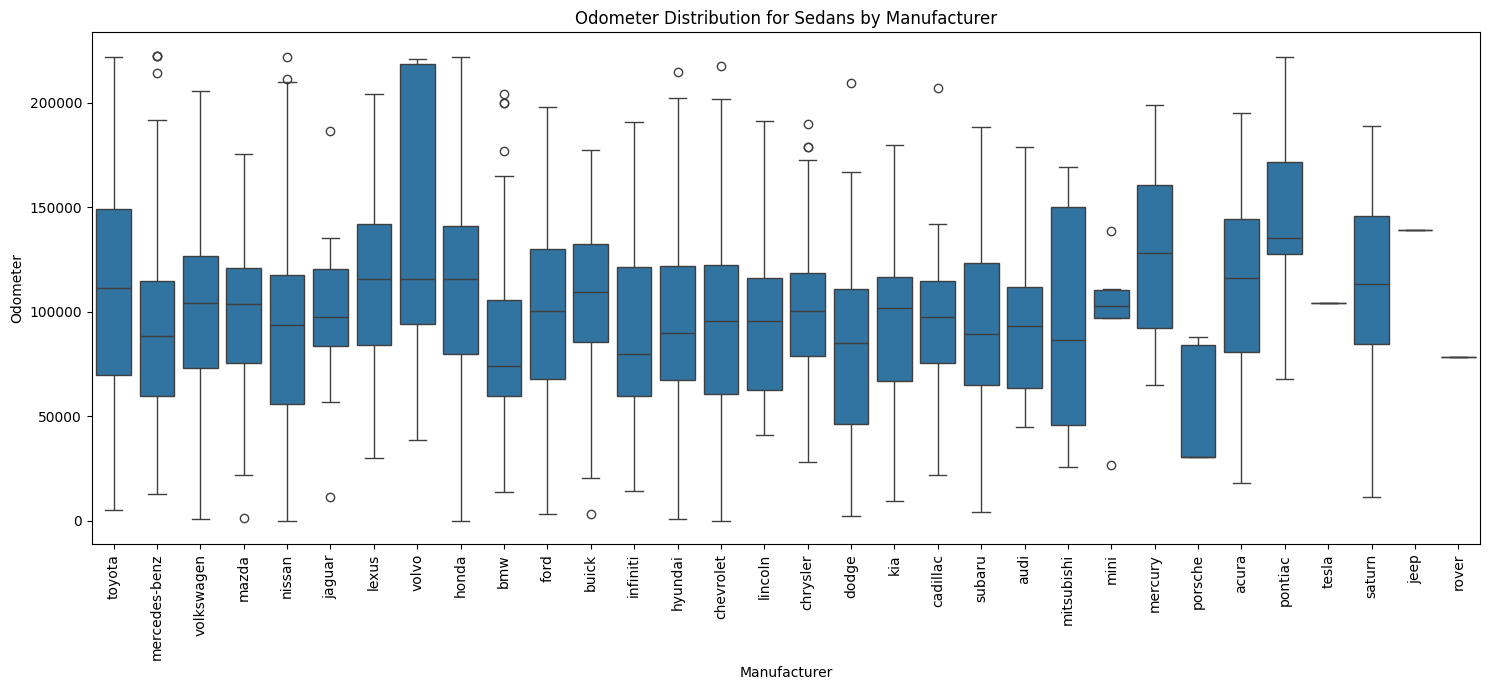

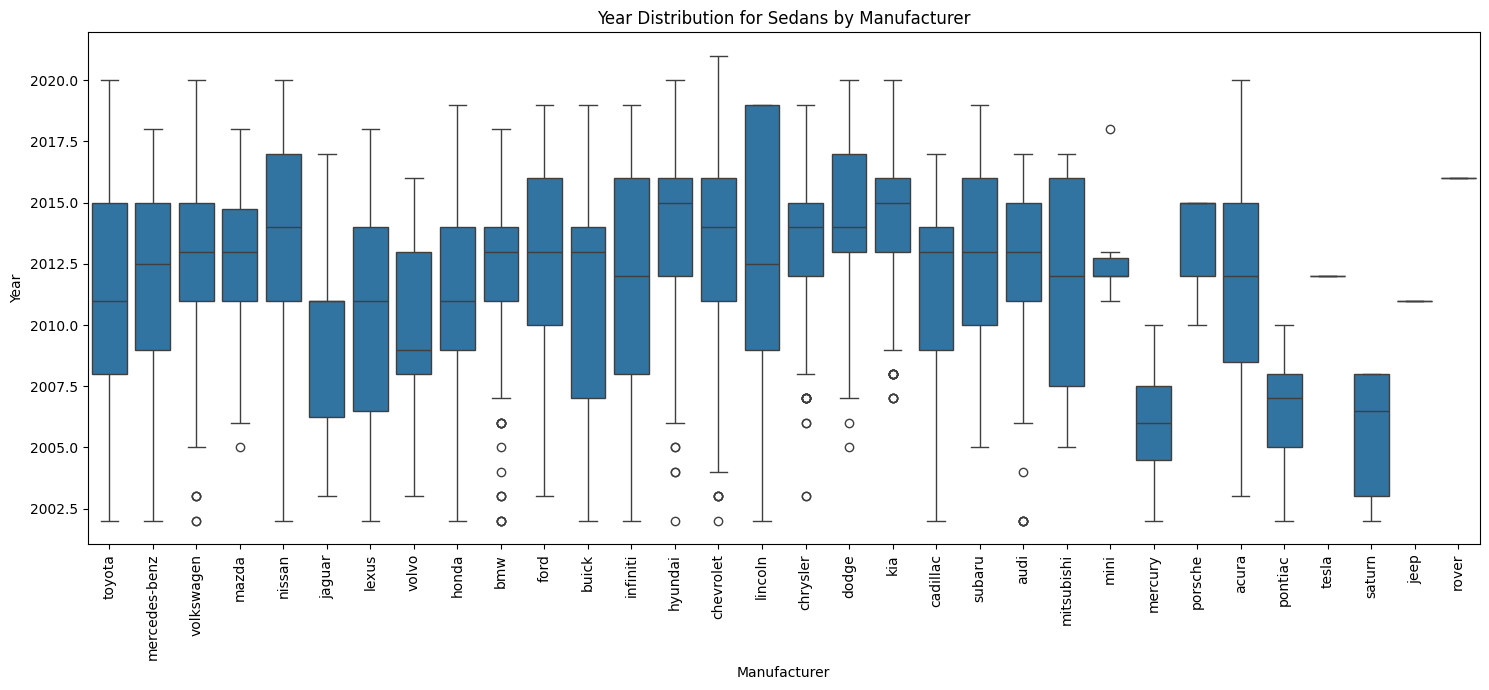

In [14]:
# further deep dive into the sedan data, need to check what's happening with the outliers.
# plan - find the outlier for sedan --> create a dataset of outlier data --> visualize

def outlier_thresholds_sedan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_price_sedan, upper_price_sedan = outlier_thresholds_sedan(sedan_data, 'price')
lower_year_sedan, upper_year_sedan = outlier_thresholds_sedan(sedan_data, 'year')
lower_odometer_sedan, upper_odometer_sedan = outlier_thresholds_sedan(sedan_data, 'odometer')


sedan_data_cleaned = sedan_data[
    (sedan_data['price'] >= lower_price_sedan) & (sedan_data['price'] <= upper_price_sedan) &
    (sedan_data['year'] >= lower_year_sedan) & (sedan_data['year'] <= upper_year_sedan) &
    (sedan_data['odometer'] >= lower_odometer_sedan) & (sedan_data['odometer'] <= upper_odometer_sedan)
].copy()

print("\nFiltered outlier data:")
print(sedan_data_cleaned.info())



# also plot this dataframe into sub plots.


# Plot price distribution for sedan data by brand
plt.figure(figsize=(15, 7))
sns.boxplot(x='manufacturer', y='price', data=sedan_data_cleaned)
plt.title('Price Distribution for Sedans by Manufacturer (Cleaned Data)')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Odo vs. Manufacturer for Sedans
plt.figure(figsize=(15, 7))
sns.boxplot(x='manufacturer', y='odometer', data=sedan_data_cleaned)
plt.title('Odometer Distribution for Sedans by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Year vs. Manufacturer for Sedans
plt.figure(figsize=(15, 7))
sns.boxplot(x='manufacturer', y='year', data=sedan_data_cleaned)
plt.title('Year Distribution for Sedans by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
# Doing PCA

cars_data_cleaned.describe()

,id,price,year,odometer
count,1.216600e+04,12166.000000,12166.000000,12166.000000
mean,7.312171e+09,13790.250205,2011.658146,104292.714532
std,4.155202e+06,10823.373355,5.028266,53604.282570
min,7.301592e+09,0.000000,1996.000000,0.000000
25%,7.309458e+09,5900.000000,2008.000000,64195.500000
50%,7.313578e+09,10999.000000,2013.000000,102859.000000
75%,7.315542e+09,19995.000000,2015.000000,139677.500000
max,7.316983e+09,45700.000000,2021.000000,258180.000000


In [16]:
# normalize data
# remove id column as it does not add any value to PCA.

cars_data_cleaned = cars_data_cleaned.drop('id', axis=1)
numerical_cols_cleaned = cars_data_cleaned.select_dtypes(include=['number'])

mu = numerical_cols_cleaned.mean()
sigma = numerical_cols_cleaned.std()

cars_data_normalized = (numerical_cols_cleaned - mu) / sigma
display(cars_data_normalized.head())

,price,year,odometer
0,-1.274118,1.261241,-0.668244
1,-1.274118,1.460117,-0.656062
2,-1.274118,1.261241,-0.704006
3,-0.904547,-1.920771,0.945956
4,-0.442584,-0.727516,-0.887853


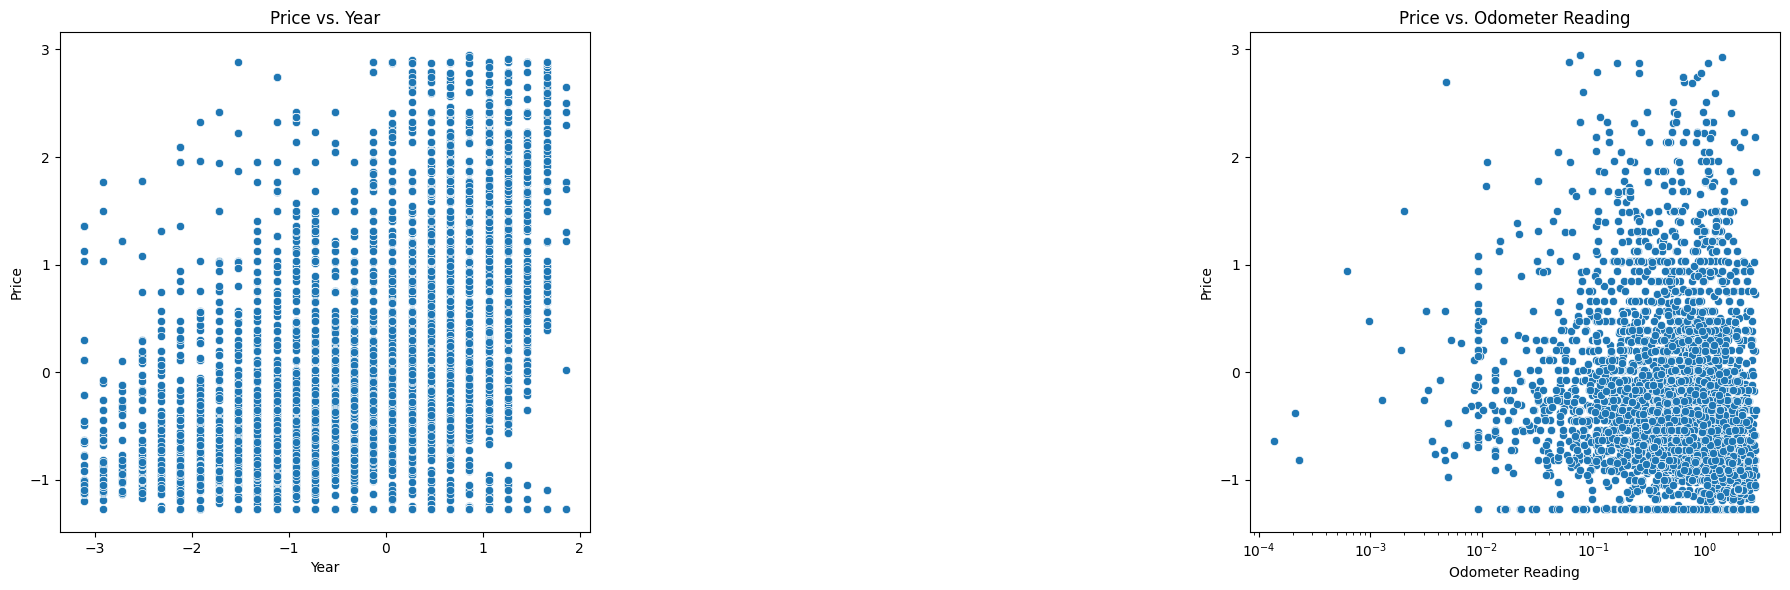

In [17]:
# checking the correlation between different features - year, condition, odometer for normalized data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# price against year
plt.subplot(1, 3, 1)
sns.scatterplot(x='year', y='price', data=cars_data_normalized)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')

# this throwing error as the condition is non-numerical feature
# # price against condition
# plt.subplot(1, 3, 2)
# sns.scatterplot(x='condition', y='price', data=cars_data_normalized)
# plt.title('Price vs. Condition')
# plt.xlabel('Condition')
# plt.ylabel('Price')
# plt.xticks(rotation=45, ha='right')

# price against odometer
plt.subplot(1, 3, 3)
sns.scatterplot(x='odometer', y='price', data=cars_data_normalized)
plt.xscale('log') # too much scattered data, changing the scale to logarithmic scale
plt.title('Price vs. Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [18]:
# svd on normalized data

from scipy.linalg import svd

# Perform SVD on the normalized data
U, S, VT = svd(cars_data_normalized, full_matrices=False)

print(U, S, VT)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)
print(S)



[[ 0.00400711  0.01778521  0.00786154]
 [ 0.00480923  0.01828458  0.0099121 ]
 [ 0.00415594  0.01793678  0.00753765]
 ...
 [-0.00579816  0.00423298  0.00903168]
 [-0.01320389 -0.00192547  0.00990971]
 [-0.00293516  0.00404718  0.00063464]] [146.67716486  96.89155083  74.7852705 ] [[ 0.48145794  0.62897618 -0.61039923]
 [-0.87136597  0.26845096 -0.41067679]
 [-0.09444366  0.72960472  0.67731629]]
U shape: (12166, 3)
S shape: (3,)
VT shape: (3, 3)
[146.67716486  96.89155083  74.7852705 ]


In [19]:
# verifying decomposition - vector factorization
# Sigma = np.diag(S)
# V = VT.T
# print(Sigma)
# print(V)
# # verify decomposition

# U@Sigma@VT
# np.allclose(cars_data_normalized, U@Sigma@VT)

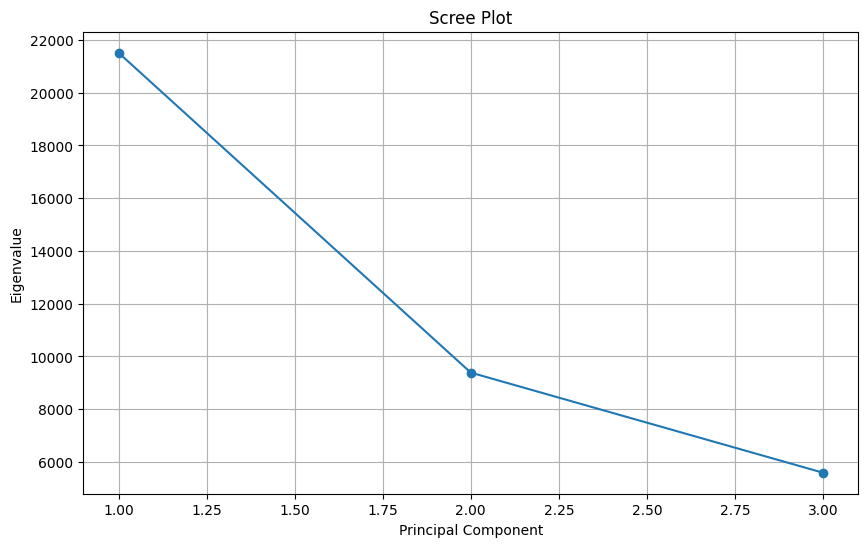

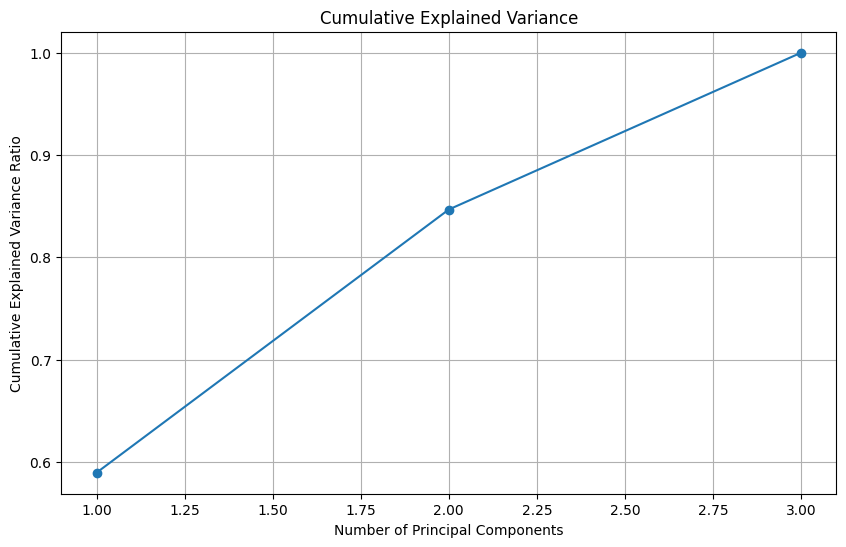

In [20]:
# next creating scree plot
# this will help in selecting the number of PC to consider.


# Calculate eigenvalues from singular values
eigenvalues = S**2

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Also plot the cumulative explained variance
explained_variance_ratio = eigenvalues / eigenvalues.sum()
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [21]:
print(VT)

[[ 0.48145794  0.62897618 -0.61039923]
 [-0.87136597  0.26845096 -0.41067679]
 [-0.09444366  0.72960472  0.67731629]]


In [22]:
# keeping first 2 components
# create a new matrix with loading for first 2 rows from VT matrix
loading_matrix = VT[:2, :]
loading_matrix

array([[ 0.48145794,  0.62897618, -0.61039923],
       [-0.87136597,  0.26845096, -0.41067679]])

In [23]:
# Original data matrix is cars_data_normalized

# Multiply original data matrix (cars_data_normalized) by the transpose of the loading matrix

transformed_data = cars_data_normalized.dot(loading_matrix.T)

# Display the transformed data (the principal components)

print("Transformed data shape:", transformed_data.shape)
print(transformed_data.head())

Transformed data shape: (12166, 2)
          0         1
0  0.587752  1.723236
1  0.705404  1.771622
2  0.609581  1.737923
3 -2.221031 -0.115923
4 -0.128731  0.554971


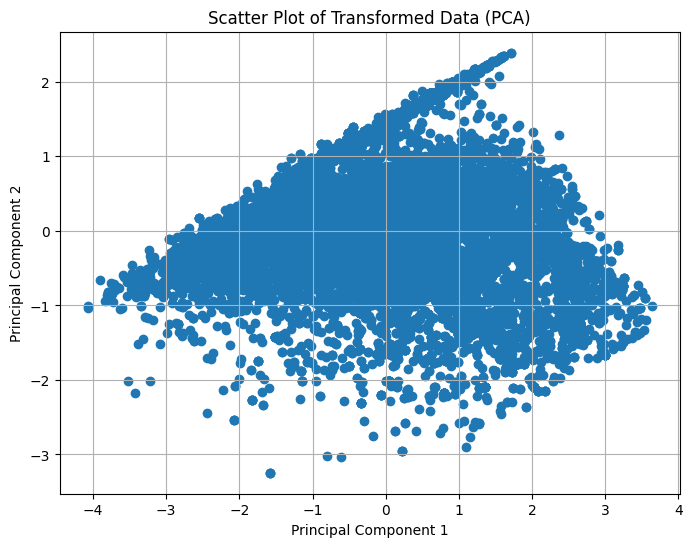

In [24]:
# create a scatter plot of transformed data

import matplotlib.pyplot as plt
# Create a scatter plot of the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1])
plt.title('Scatter Plot of Transformed Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [25]:
# display the loading matrix
# Price, Year, Odometer,

print("\nLoading Matrix:")
loading_matrix


Loading Matrix:


array([[ 0.48145794,  0.62897618, -0.61039923],
       [-0.87136597,  0.26845096, -0.41067679]])

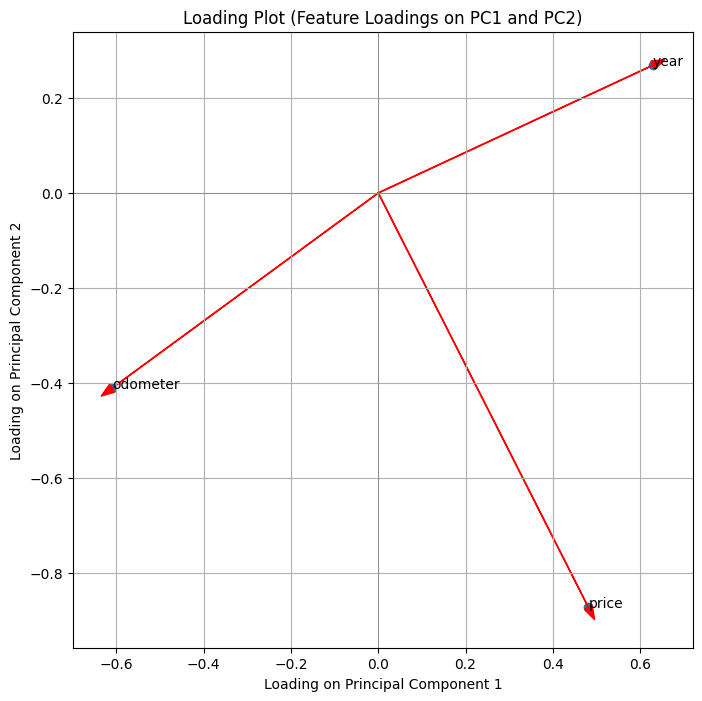

In [26]:
# create a plot of the loading matrix to visualize the feature loading

import matplotlib.pyplot as plt

# Feature names
feature_names = cars_data_normalized.columns

# Scatter plot for the loading matrix
plt.figure(figsize=(8, 8))
plt.scatter(loading_matrix[0, :], loading_matrix[1, :])

# Andding feature names
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (loading_matrix[0, i], loading_matrix[1, i]))

plt.title('Loading Plot (Feature Loadings on PC1 and PC2)')
plt.xlabel('Loading on Principal Component 1')
plt.ylabel('Loading on Principal Component 2')
plt.grid(True)
# Draw lines from origin to the feature points
for i in range(loading_matrix.shape[1]):
    plt.arrow(0, 0, loading_matrix[0, i], loading_matrix[1, i], head_width=0.02, head_length=0.03, fc='red', ec='red')

# Set limits for better visualization if needed
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

In [27]:
# linear regression model to predict price using cars_data_cleaned

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# declaring the input (X) and output(y) for model
X = cars_data_cleaned[['year', 'odometer']]
y = cars_data_cleaned['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intantiating  and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test set predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display model coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')





Mean Squared Error: 107681302.65299296
R-squared: 0.10097994759601892
Coefficients: [ 5.38613634e+02 -2.90298206e-02]
Intercept: -1066702.2939822096


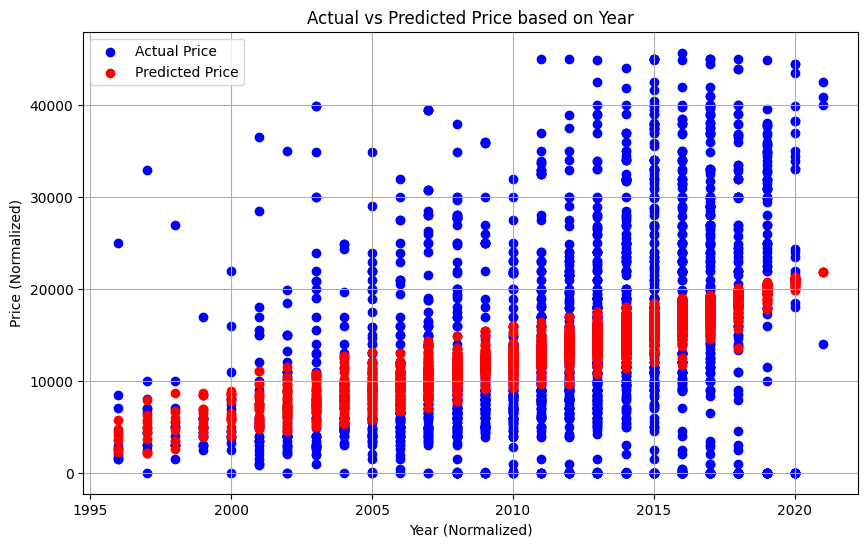

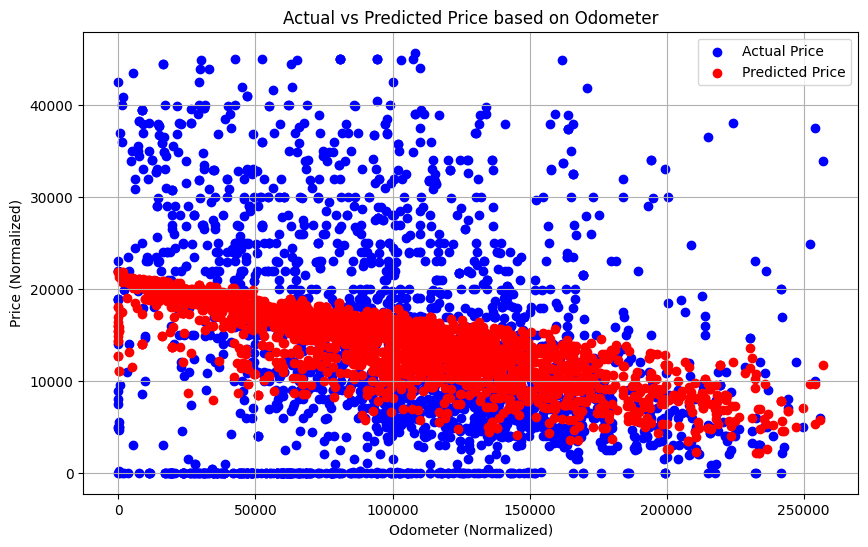

In [28]:

#Visualize the predictions vs actual values (for a single feature like year)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['year'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['year'], y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price based on Year')
plt.xlabel('Year (Normalized)')
plt.ylabel('Price (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

#Visualize the predictions vs actual values (for a single feature like odometer)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['odometer'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['odometer'], y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price based on Odometer')
plt.xlabel('Odometer (Normalized)')
plt.ylabel('Price (Normalized)')
plt.legend()
plt.grid(True)
plt.show()